##  **RANDOM FOREST**

The aim is to use the Random Forest model to do classification and regression both.

## CLASSIFICATION

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('football.csv')

In [48]:
X = df.drop(columns=['contribution_type','player_traits','player_tags','body_type','goalkeeping_speed','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['contribution_type']

In [49]:
X.fillna(X.mean(),inplace=True)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training a random forest calssifier :--**

In [51]:
from sklearn.ensemble import RandomForestClassifier

some perameters:

n_estimatorsint   -->
The number of trees in the forest.

criterion{“gini”, “entropy”, “log_loss”}  -->
The function to measure the quality of a split.

max_depth  -->
The maximum depth of the tree





## Using 'gini'

In [52]:
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Train the model on the training data
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation of model:

Accuracy and F1 Score

In [53]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_pred = randomforest_classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

Test Accuracy: 0.8913183279742766
F1 Score: 0.8786791098348887


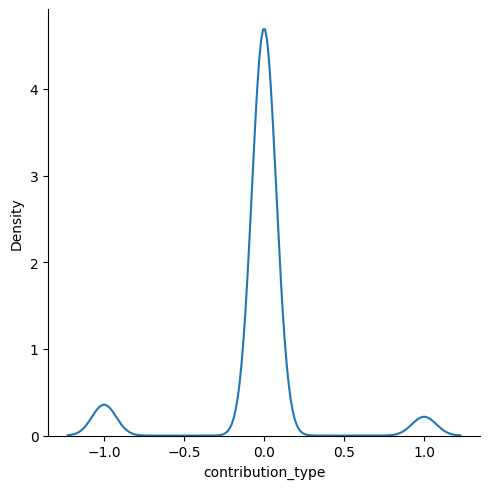

In [54]:
import seaborn as sns
sns.displot(y_pred-y_test,kind="kde")

# Using 'entropy' and  'min_samples_split = 4'

In [55]:
randomforest_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',min_samples_split=4, random_state=42)

# Train the model on the training data
randomforest_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=50, random_state=42)

Accuracy and F1 Score

In [56]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_pred = randomforest_classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

Test Accuracy: 0.8868167202572347
F1 Score: 0.8735632183908046


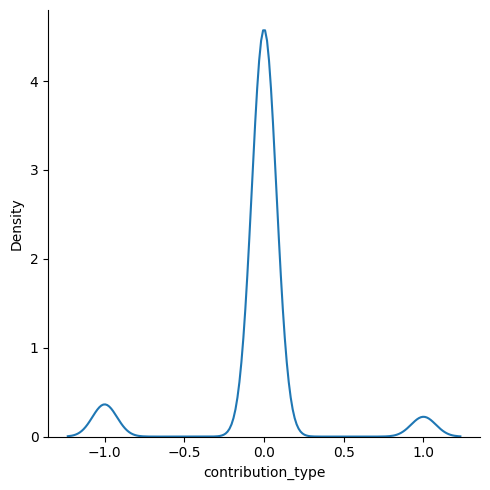

In [57]:
import seaborn as sns
sns.displot(y_pred-y_test,kind="kde")

# using 'log_loss' and  'max_depth=8'

In [58]:
randomforest_classifier = RandomForestClassifier(n_estimators=88, criterion='log_loss',max_depth=12,min_samples_split=5, random_state=42)

# Train the model on the training data
randomforest_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='log_loss', max_depth=12, min_samples_split=5,
                       n_estimators=88, random_state=42)

Accuracy and F1 Score:

In [59]:
from sklearn.metrics import accuracy_score, f1_score


y_pred = randomforest_classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

Test Accuracy: 0.8887459807073955
F1 Score: 0.8759856630824373


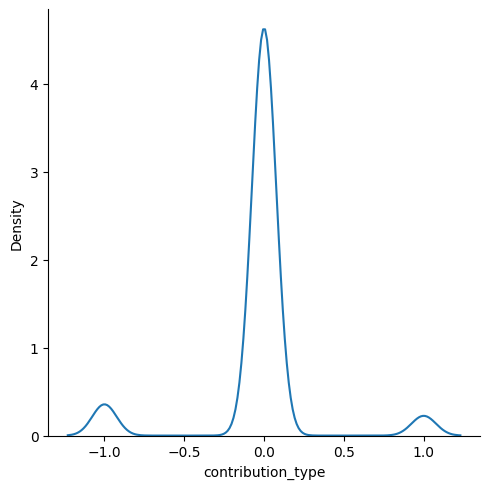

In [60]:
import seaborn as sns
sns.displot(y_pred-y_test,kind="kde")

# REGRESSION

In [61]:
X = df.drop(columns=['overall','player_traits','player_tags','body_type','goalkeeping_speed','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['overall']

In [62]:
X.fillna(X.mean(),inplace=True)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest model for regression:

# using MSE

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

randomforest_mse = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=42)

# Train the models on the training data
randomforest_mse.fit(X_train, y_train)



RandomForestRegressor(n_estimators=50, random_state=42)

In [65]:
# Make predictions on the test data
y_pred_mse = randomforest_mse.predict(X_test)


# Calculate test MSE
mse = mean_squared_error(y_test, y_pred_mse)

print("Test MSE (Using MSE Criterion):", mse)


Test MSE (Using MSE Criterion): 0.3043120257234727


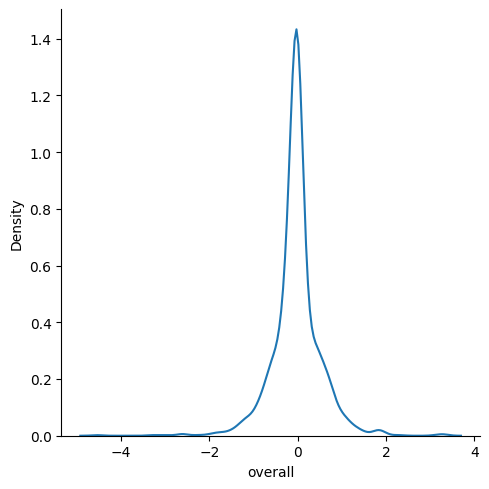

In [66]:
import seaborn as sns
sns.displot(y_pred_mse-y_test,kind="kde")

# Using MAE  and  'max_depth=10'

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

randomforest_mae = RandomForestRegressor(n_estimators=50, criterion='absolute_error',max_depth=10, random_state=42)

# Train the models on the training data
randomforest_mae.fit(X_train, y_train)



RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=50,
                      random_state=42)

In [68]:
# Make predictions on the test data
y_pred_mae = randomforest_mae.predict(X_test)


# Calculate test  MAE
mae = mean_absolute_error(y_test, y_pred_mse)

print("Test MAE (Using MAE Criterion):", mae)


Test MAE (Using MAE Criterion): 0.3403601286173635


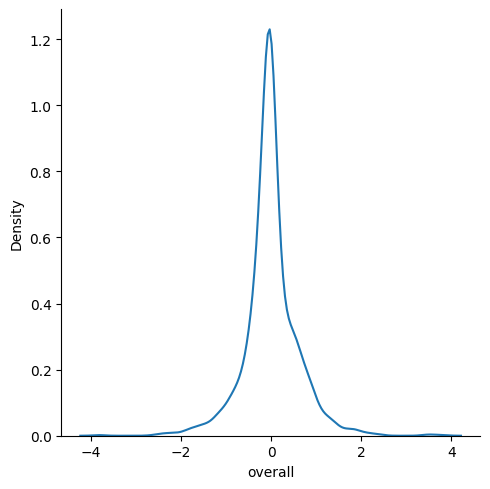

In [69]:
import seaborn as sns
sns.displot(y_pred_mae-y_test,kind="kde")